<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Finance with Python

**Chapter 04 &mdash; Optimality**

In [1]:
%matplotlib inline
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.family'] = 'serif'

## Utility Maximization

In [2]:
def u(c):
    return -c[0] * c[1]

In [3]:
w = 10

In [4]:
from scipy.optimize import minimize

In [5]:
cons = ({'type': 'eq', 'fun': lambda c: c[0] + c[1] - w})

In [6]:
opt = minimize(u, (1, 1), constraints=cons)

In [7]:
opt

     fun: -24.999999999999996
     jac: array([-5., -5.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 5.,  5.])

In [8]:
-opt['fun']

24.999999999999996

In [9]:
def iu(u, c0):
    return u / c0

In [10]:
def c1(c0):
    return w - c0

In [11]:
import numpy as np

In [12]:
from pylab import plt
%matplotlib inline

In [13]:
c0 = np.linspace(1, w)

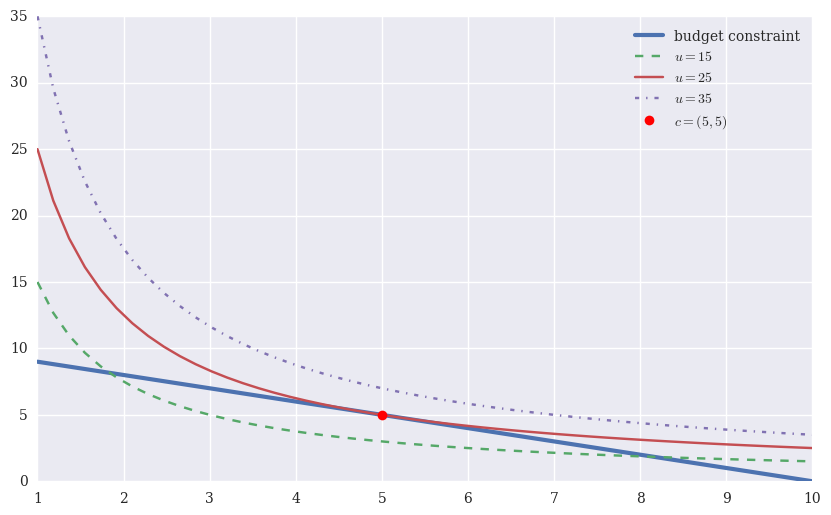

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(c0, c1(c0), label='budget constraint', lw=3.0)
plt.plot(c0, iu(15, c0), '--', label='$u=15$')
plt.plot(c0, iu(25, c0), label='$u=25$')
plt.plot(c0, iu(35, c0), '-.', label='$u=35$')
plt.plot(opt['x'][0], opt['x'][1], 'ro', label='$c=(5, 5)$')
plt.legend(loc=0)
# plt.savefig('../../images/ch04/opt_01.png')

## Logarithmic Function

In [15]:
import numpy as np

In [16]:
x = np.linspace(0.5, 10, 50)

In [17]:
x.round(3)

array([  0.5  ,   0.694,   0.888,   1.082,   1.276,   1.469,   1.663,
         1.857,   2.051,   2.245,   2.439,   2.633,   2.827,   3.02 ,
         3.214,   3.408,   3.602,   3.796,   3.99 ,   4.184,   4.378,
         4.571,   4.765,   4.959,   5.153,   5.347,   5.541,   5.735,
         5.929,   6.122,   6.316,   6.51 ,   6.704,   6.898,   7.092,
         7.286,   7.48 ,   7.673,   7.867,   8.061,   8.255,   8.449,
         8.643,   8.837,   9.031,   9.224,   9.418,   9.612,   9.806,  10.   ])

In [18]:
u = np.log(x)

In [19]:
u1 = 1 / x

In [20]:
u2 = -1 / x ** 2

In [21]:
from pylab import plt

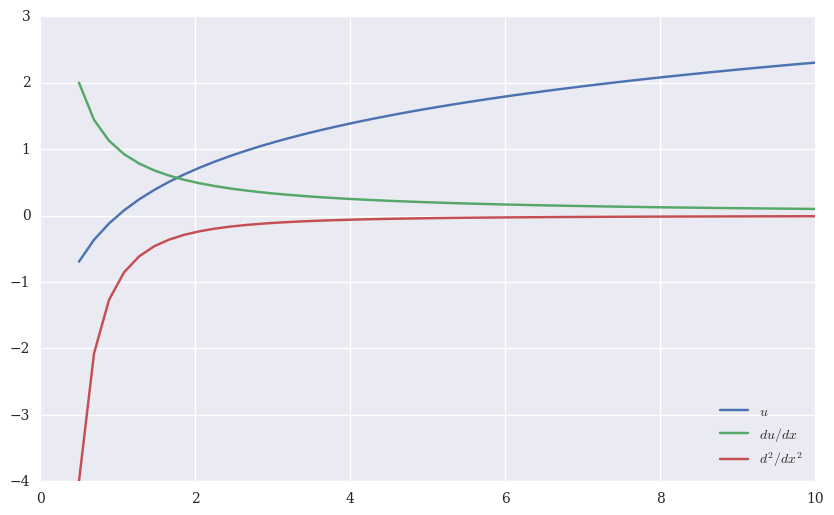

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x, u, label='$u$')
plt.plot(x, u1, label='$du/dx$')
plt.plot(x, u2, label='$d^2/dx^2$')
plt.legend(loc=0)
# plt.savefig('../../images/ch04/natural_log.png')

## Time-Additive Utility

In [23]:
import math

In [24]:
from scipy.optimize import minimize

In [25]:
kappa = 10 / 11

In [26]:
def U(c):
    return -(math.log(c[0]) +  kappa * math.log(c[1]))

In [27]:
w = 10

In [28]:
cons = ({'type': 'eq', 'fun': lambda c: c[0] + c[1] - w})

In [29]:
opt = minimize(U, (1, 1), constraints=cons)

In [30]:
opt

     fun: -3.0747286083027885
     jac: array([-0.19090861, -0.19090962,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 5.23810858,  4.76189142])

In [31]:
-opt['fun']

3.0747286083027885

## Optimal Investment Portfolio

In [32]:
import numpy as np

In [33]:
from scipy.optimize import minimize

In [34]:
B = (10, (11, 11))

In [35]:
S = (10, (20, 5))

In [36]:
M0 = np.array((B[0], S[0]))

In [37]:
M = np.array((B[1], S[1])).T

In [38]:
p = 0.5

In [39]:
P = np.array((p, 1-p))

In [40]:
def U(phi):
    c1 = np.dot(M, phi)
    return -np.dot(P, np.log(c1))

In [41]:
-U((1, 0))

2.3978952727983707

In [42]:
-U((0, 1))

2.3025850929940455

In [43]:
-U((0.5, 0.5))

2.4101407828025181

In [44]:
w = 10

In [45]:
cons = ({'type': 'eq', 'fun': lambda phi: np.dot(M0, phi) - w})

In [46]:
opt = minimize(U, (1, 1), constraints=cons)

In [47]:
opt

     fun: -2.4183062699269477
     jac: array([-1.00000322, -0.99999261,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.69441966,  0.30558034])

In [48]:
-opt['fun']

2.4183062699269477

In [49]:
-U(opt['x'])

2.4183062699269477

In [50]:
np.dot(M, opt['x'])

array([ 13.75022303,   9.16651798])

## Time-Additive Expected Utility

In [51]:
M0 = np.array((1, B[0], S[0]))

In [52]:
kappa = 10 / 11

In [53]:
def U(phi):
    c0 = phi[0]
    c1 = np.dot(M, phi[1:])
    return -(np.log(c0) + kappa * np.dot(P, np.log(c1)))

In [54]:
opt = minimize(U, (1, 1, 1), constraints=cons)

In [55]:
opt

     fun: -3.179929598031404
     jac: array([-0.19087657, -1.9093222 , -1.90973628,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 5.23898714,  0.33086688,  0.14523441])

In [56]:
-opt['fun']

3.179929598031404

In [57]:
opt['x'][0]

5.2389871446758818

In [58]:
np.dot(M, opt['x'][1:])

array([ 6.54422379,  4.36570771])

## A Numerical Example I

In [59]:
import numpy as np

In [60]:
p = 1 / 3

In [61]:
P = np.array((p, (1-p)))

In [62]:
B1 = np.array((11, 11))

In [63]:
S1 = np.array((20, 5))

In [64]:
zeta = np.dot(S1 / (B1 + S1), P) / np.dot(B1 / (B1 + S1), P)

In [65]:
zeta

0.73426573426573427

In [66]:
w = 15

In [67]:
B0 = w / (1 + zeta)

In [68]:
B0

8.6491935483870979

In [69]:
S0 = zeta * B0

In [70]:
S0

6.3508064516129039

In [71]:
B0 + S0

15.000000000000002

In [72]:
i = B1.mean() / B0 - 1

In [73]:
i

0.27179487179487172

In [74]:
mu = np.dot(S1, P) / S0 - 1

In [75]:
mu

0.57460317460317434

In [76]:
import sympy as sy

In [77]:
q = sy.Symbol('q')

In [78]:
eq = (q * 20 + (1-q) * 5) / (1 + i) - S0

In [79]:
eq

11.7943548387097*q - 2.41935483870968

In [80]:
q = sy.solve(eq)[0]

In [81]:
q

0.205128205128205

In [82]:
Q = np.array((q, 1-q))

In [83]:
np.dot(B1, Q) / (1 + i)

8.64919354838710

In [84]:
np.dot(S1, Q) / (1 + i)

6.35080645161290

## Pricing in Incomplete Markets

In [85]:
import numpy as np

In [86]:
p = 1 / 3

In [87]:
P = np.array((p, p, p))

In [88]:
B1 = np.array((11, 11, 11))

In [89]:
S1 = np.array((20, 10, 5))

In [90]:
zeta = np.dot(S1 / (B1 + S1), P) / np.dot(B1 / (B1 + S1), P)

In [91]:
zeta

0.9155274934101636

In [92]:
w = 15

In [93]:
B0 = w / (1 + zeta)

In [94]:
B0

7.8307411674347165

In [95]:
S0 = zeta * B0

In [96]:
S0

7.1692588325652844

In [97]:
B0 + S0

15.0

In [98]:
i = B1.mean() / B0 - 1

In [99]:
i

0.40472016183411985

In [100]:
mu = np.dot(S1, P) / S0 - 1

In [101]:
mu

0.62731837964512871

## Martingale Measures in Incomplete Markets

In [102]:
import sympy as sy

In [103]:
qu = sy.Symbol('qu')
qm = sy.Symbol('qm')

In [104]:
eq = (qu * 20 + qm * 10 + (1-qu-qm) * 5) / (1 + i) - S0

In [105]:
eq

3.55942780337942*qm + 10.6782834101383*qu - 3.60983102918587

In [106]:
Q = sy.solve(eq, set=True)

In [107]:
Q

([qm], {(-3.00000000000001*qu + 1.01416048550236,)})

### A Numerical Example II

In [108]:
import numpy as np

In [109]:
p = 1 / 3

In [110]:
P = np.array((p, p, p))

In [111]:
B1 = np.array((11, 11, 11))

In [112]:
S1 = np.array((20, 10, 5))

In [113]:
C1 = np.array((5, 0, 0))

In [114]:
zeta_1 = np.dot(S1 / (B1 + S1 + C1), P) / np.dot(B1 / (B1 + S1 + C1), P)

In [115]:
zeta_1

0.88620013080444737

In [116]:
zeta_2 = np.dot(C1 / (B1 + S1 + C1), P) / np.dot(B1 / (B1 + S1 + C1), P)

In [117]:
zeta_2

0.091563113145846947

In [118]:
w = 15

In [119]:
B0 = w / (1 + zeta_1 + zeta_2)

In [120]:
B0

7.5843253968253963

In [121]:
S0 = zeta_1 * B0

In [122]:
S0

6.7212301587301582

In [123]:
C0 = zeta_2 * B0

In [124]:
C0

0.69444444444444431

In [125]:
B0 + S0 + C0

14.999999999999998

In [126]:
i = B1.mean() / B0 - 1

In [127]:
i

0.45035971223021587

In [128]:
muS = np.dot(S1, P) / S0 - 1

In [129]:
muS

0.73579335793357936

In [130]:
muC = np.dot(C1, P) / C0 - 1

In [131]:
muC

1.4000000000000004

In [132]:
M = np.array((B1, S1, C1)).T

In [133]:
M

array([[11, 20,  5],
       [11, 10,  0],
       [11,  5,  0]])

In [134]:
M0 = np.array((B0, S0, C0))

In [135]:
Q = np.linalg.solve(M.T / (1 + i), M0)

In [136]:
Q

array([ 0.20143885,  0.34532374,  0.45323741])

In [137]:
sum(Q)

1.0

In [138]:
np.allclose(np.dot(M.T, Q), M0 * (1 + i))

True

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Python Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>